In [2]:
%load_ext tikzmagic

---
slug: "/blog/wordembeddings"
date: "2021-05-13"
title: "Word Embeddings"
category: "3 Natural Language Processing"
order: 2
---

### Introduction

Word embeddings are a method of representation learning that seeks to turn words into vectors such that when a pair of vectors $\vec{w}_1$ and $\vec{w}_2$ are close to each other, the words that they represent are semantically similar, and when the vectors are far away, the corresponding words are semantically distant from each other. 
Generally speaking, word embeddings are constructed by leveraging the distributional semantics hypothesis, which states that words that appear in similar contexts, or have similar distributions, are semantically similar.

### Co-occurrence Vectors

Creating co-occurrence vectors for words in a corpus a simple way of representing words as vectors in a space that models semantic relationships between words.
One way to create co-occurrence vectors is to create $V$ vectors of size $V$, where $V$ is the total size of the vocabulary. 
When two words, $w_1$ and $w_2$ are in the same document, the $w_2$ column for $w_1$ is incremented by 1, and the $w_1$ column for $w_2$ is incremented by 1. 
In another approach, increments can be made when two words are within a preset window size of each other.

In the example corpus shown below, there only four documents, and only the words immediately previous and immediately following a given word $w$ are considered when creating its co-occurrence embedding.
There are a total of 7 words in the entire vocabulary, so there are 7 co-occurrence vectors (shown below), each of size 7.
The row representing "likes" contains a 1 in the "Bob" column because the "Bob" appears next to "likes" in at least one document in the corpus.
Similarly, the "likes" row also contains a 1 in the "pizza" and "wings" columns

1. Bob likes pizza
2. Bob likes wings
3. Bob dislikes kale
3. Bob dislikes lettuce

| |Bob|dislikes|kale|lettuce|likes|pizza|wings|
|-|---|--------|----|-------|-----|-----|-----|
|Bob|1|1|0|0|1|0|0|
|dislikes|1|1|1|1|0|0|0|
|kale|0|1|1|0|0|0|0|
|lettuce|0|1|0|1|0|0|0|
|likes|1|0|0|0|1|1|1|
|pizza|0|0|0|0|1|1|0|
|wings|0|0|0|0|1|0|1|

Despite how simple this corpus and set of word embeddings is, there are still semantic relationships that can be learned.
A simple and effective way to check similarity between words using embeddings is cosine similarity, which measures the cosine of the angle between the two embeddings, as shown below.

$$
\begin{aligned}
    csim(w_1, w_2) 
    &= 
    \frac{
        w_1 \cdot w_2
    }{
        ||w_1|| \times||w_2||
    }
    &
    [\text{Cosine Similarity}]\\
    &=
    \frac{
        \sum_{i=1} {w_1}_i \times {w_2}_i
    }{
        \sqrt{\sum_{i=1} {{w_1}_i}^2} \times \sqrt{\sum_{i=1} {{w_2}_i}^2}
    }
    \\
\end{aligned}
$$

Given the example word embedding space defined above, "lettuce" and "kale" have a cosine similarity of 0.5, and "pizza" and "wings" have a cosine similarity of 0.5.
However the pair "lettuce" and "wings", or pair "pizza" and "kale", both have cosine similarities of 0.
This is because "lettuce" and "kale" both appear in context with "likes", and "pizza" and wings" both appear in context with "dislikes".
Measuring semantic similarity using this approach is one way that word embeddings can be useful.

### Word2Vec

Using co-occurrence vectors can be effective, but has several limitations.
The most obvious limitation is the size of the embeddings ($V$). 
In addition, in most cases, the entries of vectors will be zero. 
Word2Vec, an approach developed by Mikolov et al. in 2013 creates dense arbitrarily-sized word embeddings that generally work better than the sparsely populated co-occurrence vectors. 

At a high level, the word2vec approach learns a binary classifier that determines whether or not a pair of words might appear in the same context or not. 
In the skip-gram negative sampling approach, a context is a window or sequence of words, and the classifier outputs the probability $p(+|w, c)$, which is the probability that word $c$ might appear in the same context as word $w$.
Conversely, $p(-|w, c)$ is the probability that the word $c$ might not appear in the same context as word $w$.
The calculations for both of these probabilities are shown below:

$$
\begin{aligned}
    \sigma(x) &= \frac{1}{1 + e^{-x}} & [\text{Sigmoid function}]\\
    p(+|w, c) &= \sigma(c \cdot w) & [\text{Probability c is context word}]\\
    p(-|w, c) &= 1 - p(+|w, c) = \sigma(-c \cdot w) & [\text{Probability c is not context word}]\\
\end{aligned}
$$

The loss function for the word2vec model maximizes the probability $p(+|w,c)$ when words $w$ and $c$ do appear in the same window in a training data set.
It simultaneously minimizes $p(+|w,c)$ when $c$ is randomly generated, and does not necessarily appear in the same documents as $w$.
The loss function and a computation graph for learning word2vec embeddings are shown below.

$$
\begin{aligned}
    L 
    &= 
    -\log\left[ p(+|w, c_{\text{pos}})\prod^K_{i=1} p(-|w, c_{\text{neg}_i}) \right] 
    & 
    [\text{Loss function}]
    \\
    &=
    -\left[ \log p(+|w, c_{\text{pos}}) + \sum^K_{i=1} \log p(-|w, c_{\text{neg}_i}) \right] 
    &
    \\
\end{aligned}
$$

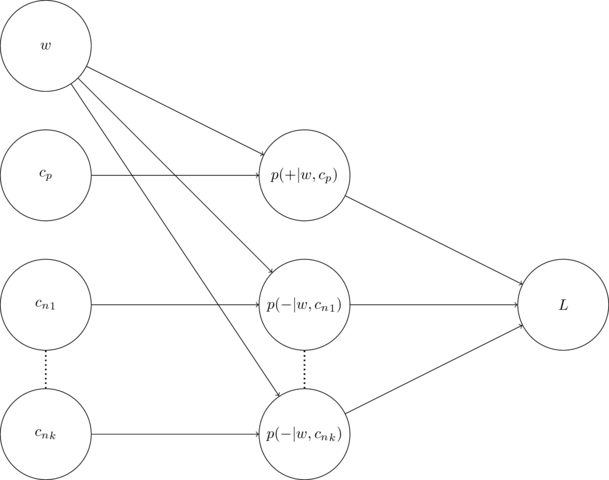

In [32]:
%%tikz -s=610,480 -sc=3
\node[draw, circle, minimum width=6em] (w) at (0, 3) {$w$};
\node[draw, circle, minimum width=6em] (cp) at (0, 2) {$c_p$};
\node[draw, circle, minimum width=6em] (cn1) at (0, 1) {${c_n}_1$};
\node[draw, circle, minimum width=6em] (cnk) at (0, 0) {${c_n}_k$};
\node[draw, circle, minimum width=6em] (pcp) at (2, 2) {$p(+|w, c_p)$};
\node[draw, circle, minimum width=6em] (pcn1) at (2, 1) {$p(-|w, {c_n}_1)$};
\node[draw, circle, minimum width=6em] (pcnk) at (2, 0) {$p(-|w, {c_n}_k)$};
\node[draw, circle, minimum width=6em] (l) at (4, 1) {$L$};
\draw[->] (w) -- (pcp);
\draw[->] (w) -- (pcn1);
\draw[->] (w) -- (pcnk);
\draw[->] (cp) -- (pcp);
\draw[->] (cn1) -- (pcn1);
\draw[->] (cnk) -- (pcnk);
\draw[->] (pcp) -- (l);
\draw[->] (pcn1) -- (l);
\draw[->] (pcnk) -- (l);
\draw[dotted, line width=1pt] (cn1) -- (cnk);
\draw[dotted, line width=1pt] (pcn1) -- (pcnk);

Given a word $w$ in a document, positive context words are drawn directly from the training data by sampling words that appear within the same window as $w$. 
Assuming a window size of 2 and the example sentence "This is an example sentence", positive context words for "example" would be "an" and "sentence".

Negative context words are drawn using a random weighting scheme based on unigram word probabilities.
In practice, better performance is achieved by using multiple negative context words for each positive context word for a given word $w$, which is why there are $K$ negative contexts in the loss function.
$K$, or the number of negative contexts to use for each postive context of a word $w$, is a word2vec model hyperparameter.
The negative sampling probability calculation used in the skip-gram negative sampling approach is displayed below.

$$
\begin{aligned}
    c(w) &\rightarrow \text{ Count of word $w$} &\\
    p_{\alpha}(w) &= \frac{c(w)^{\alpha}}{\sum_{w_i \in W} c(w_i)^{\alpha}} & [\text{Negative sampling probability}]\\
\end{aligned}
$$

The required gradients and paremeter update equations for learning using stochastic gradient descent are shown below. 
Derivations for each of the displayed gradient calculations can be found in the derivations section of this post.

$$
\begin{aligned}
    \frac{\partial L_{\text{CE}}}{\partial w}
    &=
    c_{\text{pos}} \left[\sigma(c_{\text{pos}} \cdot w) - 1\right] +
    \sum^K_{i=1} c_{\text{neg}_i} \sigma(c_{\text{neg}_i} \cdot w)
    &
    [\text{Gradient wrt $w$}]
    \\
    \frac{\partial L_{\text{CE}}}{\partial c_{\text{pos}}}
    &=
    w [\sigma(c_{\text{pos}} \cdot w) - 1]
    &
    [\text{Gradient wrt $c_{\text{pos}}$}]
    \\
    \frac{\partial L_{\text{CE}}}{\partial c_{\text{neg}_i}}
    &=
    w \sigma(c_{\text{neg}_i} \cdot w)
    &
    [\text{Gradient wrt $c_{\text{neg}_i}$}]
    \\
    w 
    &= 
    w - \alpha \frac{\partial L_{\text{CE}}}{\partial w}
    &
    [\text{$w$ update}]
    \\
    c_{\text{pos}} 
    &= 
    c_{\text{pos}} - \alpha \frac{\partial L_{\text{CE}}}{\partial c_{\text{pos}}}
    &
    [\text{$c_{\text{pos}}$ update}]
    \\
    c_{\text{neg}_i} 
    &= 
    c_{\text{neg}_i} - \alpha \frac{\partial L_{\text{CE}}}{\partial c_{\text{neg}_i}}
    &
    [\text{$c_{\text{neg}_i}$ update}]
    \\
\end{aligned}
$$

### Code

Code for a word2vec embedding generator is shown in the block below

In [1]:
from typing import List
import random

from tqdm import trange, tqdm
import numpy as np


def getUnigramProbs(dataset: List[str], alpha: float=0.75) -> (List[str], List[float]):
    """ Calculate unigram probabilities for all words in dataset. Probabilities
        are weighted to increase the probability of the rarest words

    Args:
        dataset: list of strings
        alpha: weighting hypterparameter

    Returns:
        list of vocabulary terms sorted by highest to lowest probability
        list of probabilities corresponding to the list of vocabulary terms
    """

    # Collect unigram counts
    probs = {}
    for doc in tqdm(dataset, desc='Calculating Unigram Probabilities'):
        words = doc.strip().split(' ')

        for word in words: 
            probs[word] = probs[word] + 1 if word in probs else 1

    # Transform counts into probabilities
    total = 0
    for word in probs: total += probs[word]**alpha
    for word in probs: probs[word] = (probs[word]**alpha) / total

    # Sort vocabulary by probabilities
    probs = sorted(probs.items(), key=lambda x: x[1])[::-1]
    vocab, probs = [pair[0] for pair in probs], [pair[1] for pair in probs]

    return vocab, probs


def csim(x: np.ndarray, y: np.ndarray) -> float:
    """ Calculate cosine similarity between two vectors
    """

    num = np.dot(x, y.T)
    den = np.linalg.norm(x) * np.linalg.norm(y)
    return num / den


class WeightedSampler:
    """ Implementation of Walker's Alias method for weighted random sampling
    """


    def __init__(self, vocab: List[str], probs: List[float]):
        """ Initialize weighted sampler class

        Args:
            vocab: list of vocabulary words
            probs: list of unigram probabilities for each word
        """

        self.buckets = self.getRandomSamplingBuckets(vocab, probs, 1/len(vocab))
        self.tprob = 1 / len(vocab)


    def initializeBuckets(self, buckets: List[dict], tprob: float) -> (List[dict], List[dict], List[dict]):
        """ Initialize list of buckets into one of overfull, underfull and full
            categories. Buckets are dictionaries containing two vocabulary words
            'w1' and 'w2', as well as a splitting probability 's', and a sum of
            probabilities 't'

        Args:
            buckets: list of buckets
            tprob: the total probability that each bucket must represent

        Returns:
            list of buckets that are full
            list of buckets that are underfull
            list of buckets that are overfull
        """

        full, underfull, overfull = [], [], []

        while buckets:
            cur = buckets.pop()
            if cur['t'] == tprob:
                full.append(cur)

            elif cur['t'] < tprob:
                underfull.append(cur)

            else:
                overfull.append(cur)

        return full, underfull, overfull


    def getRandomSamplingBuckets(self, vocab: List[str], probs: List[float], tprob: float) -> List[dict]:
        """ Reorganize buckets until each bucket contains two vocabulary words
            and all buckets have an equivalent total probability. Buckets are
            dictionaries containing two vocabulary words 'w1' and 'w2', as well
            as a splitting probability 's', and a sum of probabilities 't'

        Args:
            vocab: list of vocabulary words
            probs: list of unigram probabilities for each word
            tprob: the total probability that each bucket must represent

        Returns:
            list of buckets s.t. all buckets have two words and the same total probability
        """

        buckets = [ {'w1': vocab[idx], 'w2': None, 's': probs[idx], 't': probs[idx] } for idx in range(len(vocab)) ]
        full, underfull, overfull = self.initializeBuckets(buckets, tprob)

        while underfull:
            under = underfull.pop()
            over = overfull.pop()

            under['w2'] = over['w1']
            under['t'] = tprob 
            full.append(under)

            over['t'] = over['t'] - (tprob - under['s'])
            over['s'] = over['s'] - (tprob - under['s'])

            if over['t'] == tprob: 
                full.append(over)

            elif over['t'] < tprob: 
                underfull.append(over)                

            else: 
                overfull.append(over)

        full += overfull
        return full


    def generateWord(self) -> str:
        """ Generate randomly sampled word 

        Returns:
            randomly sampled word as string  
        """

        bucket = random.choice(self.buckets)
        splitval = random.uniform(0, self.tprob)

        word = None
        if splitval >= bucket['s']:
            word = bucket['w2']                

        else:
            word = bucket['w1']                

        return word


class Windows:
    """ Iterator for sequence of windows on list
    """


    def __init__(self, items: List, wsize: int) -> None:
        """ Instantiate Windows class

        Args:
            items: list to create windows form
            wsize: total number of items to account for on either side of item
                Given the list ['this', 'is', 'a', 'test'] with a wsize of 1 the
                Windows class will return the following windows in a for loop:
                    ['this', 'is']
                    ['this', 'is', 'a']
                    ['is', 'a', 'test']
                    ['a', 'test']
        """
        self.start = -((wsize+1)//2)
        self.end = ((wsize+1)//2)+1
        self.items = items 
        self.cidx = 0


    def __iter__(self):
        """ Returns iterator
        """
        return self


    def __next__(self) -> List:
        """ Return next available window of list

        Returns:
            window of items as a list
        """

        if self.cidx < len(self.items):

            if self.end > len(self.items):
                seq = self.items[self.start:]

            elif self.start < 0:
                seq = self.items[:self.end]

            else:
                seq = self.items[self.start:self.end]

            self.start += 1
            self.cidx += 1
            self.end += 1
            return seq

        else:
            raise StopIteration


class Word2Vec:
    """ Implementation of Word2Vec word embeddings using skip-gram negative
        sampling
    """


    def __init__(self, vocab: List[str], probs: List[float], d: int):
        """ Instantiate word2vec class

        Args:
            vocab: list of vocabulary words
            probs: unigram probabilities of each vocabulary word
            d: size of embeddings
        """

        self.w = (np.random.rand(len(vocab), d) - 0.5) / 100
        self.c = (np.random.rand(len(vocab), d) - 0.5) / 100
        self.sampler = WeightedSampler(vocab, probs)
        self.vocab = vocab
        self.vdict = { vocab[idx]: idx for idx in range(len(vocab)) }

    
    def parse(self, document: str) -> List[str]:
        """ Split document into tokens on white spaces

        Args:
            document: string to parse

        Returns:
            list of parsed tokens 
        """
        return [self.vdict[word] for word in document.strip().split(' ')]


    def train(self, corpus: List[str], epochs: int, wsize: int, k: int, alpha: float) -> None:
        """ Train word2vec model

        Args:
            corpus: list of document strings to train on
            epochs: number of passes to take over training corpus
            wsize: size of window to examine for skip-grams
            k: number of negative samples to consider for each positive sample
            alpha: learning rate
        """

        for i in range(epochs):
            for document in tqdm(corpus, desc='Training Word2Vec Model'):
                words = self.parse(document)

                cidx = 0
                for seq in Windows(words, wsize):
                    cpi = seq[:cidx] + seq[cidx+1:]
                    wi = [words[cidx]]

                    for pi in cpi:
                        cni = [self.vdict[self.sampler.generateWord()] for i in range(k)]
                        self.weightUpdate(wi, pi, cni, alpha)

                    cidx += 1


    def weightUpdate(self, wi: List[int], pi: List[int], cni: List[int], alpha: float) -> None:
        """ Update word2vec weights

        Args:
            wi: list of index for word being trained on
            pi: list of index for positive examples
            cni: list of indices for negative examples
            alpha: learning rate
        """

        # Dot products of positive examples and word and negative examples and word
        cpw = np.einsum('ij,kj->i', self.c[[pi], :], self.w[wi, :])
        cnw = np.einsum('ij,kj->i', self.c[cni, :], self.w[wi, :])

        # Sigmoid function run on dot products
        scpw = (1 / (1 + np.exp(-cpw))) - 1
        scnw = (1 / (1 + np.exp(-cnw)))[:, None]

        # Gradient for matrix w
        dwa = self.c[[pi], :] * scpw
        dwb = np.sum(self.c[cni, :] * scnw, axis=0)[None, :]
        dw = dwa + dwb

        # Gradients for matrix c
        dcp = self.w[wi, :] * scpw
        dcn = self.w[wi, :] * scnw

        # Weight updates using calculated gradients
        self.w[wi, :] = self.w[wi, :] - (alpha * dw)
        self.c[[pi], :] = self.c[[pi], :] - (alpha * dcp)
        self.c[cni, :] = self.c[cni, :] - (alpha * dcn)

### Derivations

Derivative of loss with respect to $w$:

$$
\begin{aligned}
    \frac{\partial L_{\text{CE}}}{\partial w}
    &=
    -\left[
        \log p(+|w, c_{\text{pos}}) +
        \sum^K_{i=1} \log p(-|w, c_{\text{neg}_i})
    \right]
    &
    \color{red}{\text{EQ 1}}
    \\
    &=
    -\frac{\partial}{\partial w}
    \left[
        \log p(+|w, c_{\text{pos}}) +
        \sum^K_{i=1} \log \left[1 - p(+|w, c_{\text{neg}_i})\right]
    \right]
    \\
    &=
    -
    \left[
        \frac{\partial}{\partial w} \log p(+|w, c_{\text{pos}}) +
        \sum^K_{i=1} \frac{\partial}{\partial w} \log \left[1 - p(+|w, c_{\text{neg}_i})\right]
    \right]
    \\
    &=
    -
    \left[
        [\color{red}{\text{EQ 2}}] +
        \sum^K_{i=1} [\color{red}{\text{EQ 3}}]
    \right]
    \\
    &=
    -
    \left[
        c_{\text{pos}} \left[1 - \sigma(c_{\text{pos}} \cdot w)\right] +
        \sum^K_{i=1} -c_{\text{neg}_i} \sigma(c_{\text{neg}_i} \cdot w)
    \right]
    \\
    &=
    c_{\text{pos}} \left[\sigma(c_{\text{pos}} \cdot w) - 1\right] +
    \sum^K_{i=1} c_{\text{neg}_i} \sigma(c_{\text{neg}_i} \cdot w)
    \\
    \frac{\partial}{\partial w} \log p(+|w, c_{\text{pos}})
    &=
    \frac{\partial}{\partial w} \log \sigma(c_{\text{pos}} \cdot w)
    &
    \color{red}{\text{EQ 2}}
    \\
    &=
    \frac{1}{\sigma(c_{\text{pos}} \cdot w)}
    \frac{\partial}{\partial w} \sigma(c_{\text{pos}} \cdot w)
    \\
    &=
    \frac{1}{\sigma(c_{\text{pos}} \cdot w)}
    [\color{red}{\text{EQ 4}}]
    \\
    &=
    \frac{1}{\sigma(c_{\text{pos}} \cdot w)}
    \left[
        c_{\text{pos}}
        \sigma(c_{\text{pos}} \cdot w)
        \left[1 - \sigma(c_{\text{pos}} \cdot w)\right]
    \right]
    \\
    &=
    \frac{
        c_{\text{pos}}
        \sigma(c_{\text{pos}} \cdot w)
        \left[1 - \sigma(c_{\text{pos}} \cdot w)\right]
    }{\sigma(c_{\text{pos}} \cdot w)}
    \\
    &=
    c_{\text{pos}} \left[1 - \sigma(c_{\text{pos}} \cdot w)\right]
    \\
    \frac{\partial}{\partial w} \log \left[1 - p(+|w, c_{\text{neg}_i})\right]
    &=
    \frac{\partial}{\partial w} \log \left[1 - \sigma(c_{\text{neg}_i} \cdot w)\right]
    &
    \color{red}{\text{EQ 3}}
    \\
    &=
    \frac{1}{1 - \sigma(c_{\text{neg}_i} \cdot w)}
    \frac{\partial}{\partial w} \left[1 - \sigma(c_{\text{neg}_i} \cdot w)\right]
    \\
    &=
    \frac{1}{1 - \sigma(c_{\text{neg}_i} \cdot w)}
    \frac{\partial}{\partial w} \left[-\sigma(c_{\text{neg}_i} \cdot w)\right]
    \\
    &=
    \frac{-1}{1 - \sigma(c_{\text{neg}_i} \cdot w)}
    \frac{\partial}{\partial w} \left[\sigma(c_{\text{neg}_i} \cdot w)\right]
    \\
    &=
    \frac{-1}{1 - \sigma(c_{\text{neg}_i} \cdot w)}
    [\color{red}{\text{EQ 4}}]
    \\
    &=
    \frac{-1}{1 - \sigma(c_{\text{neg}_i} \cdot w)}
    \left[
        c_{\text{neg}_i}
        \sigma(c_{\text{neg}_i} \cdot w)
        [1 - \sigma(c_{\text{neg}_i} \cdot w)]
    \right]
    \\
    &=
    \frac{
        -c_{\text{neg}_i}
        \sigma(c_{\text{neg}_i} \cdot w)
    [1 - \sigma(c_{\text{neg}_i} \cdot w)]
    }{1 - \sigma(c_{\text{neg}_i} \cdot w)}
    \\
    &=
    -c_{\text{neg}_i} \sigma(c_{\text{neg}_i} \cdot w)
    \\
    \frac{\partial}{\partial w} \sigma(c \cdot w)
    &=
    \frac{\partial}{\partial w} 
    \frac{1}{1 + e^{-c \cdot w}}
    &
    \color{red}{\text{EQ 4}}
    \\
    &=
    \frac{\partial}{\partial w} 
    [1 + e^{-c \cdot w}]^{-1}
    \\
    &=
    -[1 + e^{-c \cdot w}]^{-2}
    \frac{\partial}{\partial w} 
    [1 + e^{-c \cdot w}]
    \\
    &=
    \frac{-1}{[1 + e^{-c \cdot w}]^{2}}
    \frac{\partial}{\partial w} 
    [1 + e^{-c \cdot w}]
    \\
    &=
    \frac{-1}{[1 + e^{-c \cdot w}]^{2}}
    \frac{\partial}{\partial w} 
    e^{-c \cdot w}
    \\
    &=
    \frac{-e^{-c \cdot w}}{[1 + e^{-c \cdot w}]^{2}}
    \frac{\partial}{\partial w} 
    [-c \cdot w]
    \\
    &=
    \frac{c e^{-c \cdot w}}{[1 + e^{-c \cdot w}]^{2}}
    \\
    &=
    c
    \left[\frac{1}{1 + e^{-c \cdot w}}\right]
    \left[\frac{e^{-c \cdot w}}{1 + e^{-c \cdot w}}\right]
    \\
    &=
    c
    \sigma(c \cdot w)
    \left[\frac{e^{-c \cdot w}}{1 + e^{-c \cdot w}}\right]
    \\
    &=
    c
    \sigma(c \cdot w)
    \left[ \frac{1 + e^{-c \cdot w} - 1}{1 + e^{-c \cdot w}} \right]
    \\
    &=
    c
    \sigma(c \cdot w)
    \left[ 
        \frac{1 + e^{-c \cdot w}}{1 + e^{-c \cdot w}} -
        \frac{1}{1 + e^{-c \cdot w}} 
    \right]
    \\
    &=
    c
    \sigma(c \cdot w)
    \left[1 - \sigma(c \cdot w)\right]
    \\
\end{aligned}
$$

Derivative of loss with respect to $c_{\text{pos}}$ 

$$
\begin{aligned}
    \frac{\partial L_{\text{CE}}}{\partial c_{\text{pos}}}
    &=
    -\frac{\partial}{\partial c_{\text{pos}}}
    \left[
        \log p(+|w, c_{\text{pos}}) + 
        \sum^K_{i=1} \log p(-|w, c_{\text{neg}_i})
    \right]
    &
    \color{red}{\text{EQ 1}}
    \\
    &= 
    -\left[
        \frac{\partial}{\partial c_{\text{pos}}} \log p(+|w, c_{\text{pos}}) + 
        \sum^K_{i=1} \frac{\partial}{\partial c_{\text{pos}}} \log p(-|w, c_{\text{neg}_i})
    \right]
    \\
    &= 
    -\left[
        \frac{\partial}{\partial c_{\text{pos}}} \log p(+|w, c_{\text{pos}})
    \right]
    \\
    &= 
    -\left[
        \frac{\partial}{\partial c_{\text{pos}}} \log \sigma(c_{\text{pos}} \cdot w)
    \right]
    \\
    &= 
    -\left[
        \frac{1}{\sigma(c_{\text{pos}} \cdot w)}
        \frac{\partial}{\partial c_{\text{pos}}} \sigma(c_{\text{pos}} \cdot w)
    \right]
    \\
    &= 
    -\left[
        \frac{1}{\sigma(c_{\text{pos}} \cdot w)}
        [\color{red}{\text{EQ 2}}]
    \right]
    \\
    &= 
    -\left[
        \frac{1}{\sigma(c_{\text{pos}} \cdot w)}
        [w \sigma(c_{\text{pos}} \cdot w) \left[ 1 - \sigma(c_{\text{pos}} \cdot w) \right]]
    \right]
    \\
    &= 
    -\left[
        \frac{
            w \sigma(c_{\text{pos}} \cdot w) \left[ 1 - \sigma(c_{\text{pos}} \cdot w) \right]
        }{\sigma(c_{\text{pos}} \cdot w)}
    \right]
    \\
    &= 
    -\left[ w \left[ 1 - \sigma(c_{\text{pos}} \cdot w) \right] \right]
    \\
    &= 
    w [\sigma(c_{\text{pos}} \cdot w) - 1]
    \\
    \frac{\partial}{\partial c_{\text{pos}}} \sigma(c_{\text{pos}} \cdot w)
    &=
    \frac{\partial}{\partial c_{\text{pos}}} 
    \frac{1}{1 + e^{-c_{\text{pos}} \cdot w}}
    &
    \color{red}{\text{EQ 2}}
    \\
    &=
    \frac{\partial}{\partial c_{\text{pos}}} 
    [1 + e^{-c_{\text{pos}} \cdot w}]^{-1}
    \\
    &=
    -[1 + e^{-c_{\text{pos}} \cdot w}]^{-2}
    \frac{\partial}{\partial c_{\text{pos}}} 
    [1 + e^{-c_{\text{pos}} \cdot w}]
    \\
    &=
    \frac{-1}{[1 + e^{-c_{\text{pos}} \cdot w}]^{2}}
    \frac{\partial}{\partial c_{\text{pos}}} 
    [1 + e^{-c_{\text{pos}} \cdot w}]
    \\
    &=
    \frac{-1}{[1 + e^{-c_{\text{pos}} \cdot w}]^{2}}
    \frac{\partial}{\partial c_{\text{pos}}} 
    e^{-c_{\text{pos}} \cdot w}
    \\
    &=
    \frac{-e^{-c_{\text{pos}} \cdot w}}{[1 + e^{-c_{\text{pos}} \cdot w}]^{2}}
    \frac{\partial}{\partial c_{\text{pos}}} 
    [-c_{\text{pos}} \cdot w]
    \\
    &=
    \frac{we^{-c_{\text{pos}} \cdot w}}{[1 + e^{-c_{\text{pos}} \cdot w}]^{2}}
    \\
    &=
    w
    \left[\frac{1}{1 + e^{-c_{\text{pos}} \cdot w}}\right]
    \left[\frac{e^{-c_{\text{pos}} \cdot w}}{1 + e^{-c_{\text{pos}} \cdot w}}\right]
    \\
    &=
    w
    \sigma(c_{\text{pos}} \cdot w)
    \left[ \frac{e^{-c_{\text{pos}} \cdot w}}{1 + e^{-c_{\text{pos}} \cdot w}} \right]
    \\
    &=
    w
    \sigma(c_{\text{pos}} \cdot w)
    \left[ \frac{1 + e^{-c_{\text{pos}} \cdot w} - 1}{1 + e^{-c_{\text{pos}} \cdot w}} \right]
    \\
    &=
    w
    \sigma(c_{\text{pos}} \cdot w)
    \left[
        \frac{1 + e^{-c_{\text{pos}} \cdot w}}{1 + e^{-c_{\text{pos}} \cdot w}} -
        \frac{1}{1 + e^{-c_{\text{pos}} \cdot w}}
    \right]
    \\
    &=
    w \sigma(c_{\text{pos}} \cdot w) \left[ 1 - \sigma(c_{\text{pos}} \cdot w) \right]
    \\
\end{aligned}
$$

Derivative of loss with respect to $c_{\text{neg}_i}$ 

$$
\begin{aligned}
    \frac{\partial L_{\text{CE}}}{\partial c_{\text{neg}_i}}
    &=
    -\frac{\partial}{\partial c_{\text{neg}_i}}
    \left[
        \log p(+|w, c_{\text{pos}}) + 
        \sum^K_{j=1} \log p(-|w, c_{\text{neg}_j})
    \right]
    &
    \color{red}{\text{EQ 1}}
    \\
    &=
    -
    \left[
        \frac{\partial}{\partial c_{\text{neg}_i}} \log p(+|w, c_{\text{pos}}) + 
        \frac{\partial}{\partial c_{\text{neg}_i}} \sum^K_{j=1} \log p(-|w, c_{\text{neg}_j})
    \right]
    \\
    &=
    -
    \left[
        \frac{\partial}{\partial c_{\text{neg}_i}} 
        \sum^K_{j=1} \log p(-|w, c_{\text{neg}_j})
    \right]
    \\
    &=
    -
    \left[
        \frac{\partial}{\partial c_{\text{neg}_i}} 
        \sum^K_{j=1} \log [1 - p(+|w, c_{\text{neg}_j})]
    \right]
    \\
    &=
    -
    \left[
        \frac{\partial}{\partial c_{\text{neg}_i}} 
        \log [1 - p(+|w, c_{\text{neg}_i})]
    \right]
    \\
    &=
    - \left[
        \frac{\partial}{\partial c_{\text{neg}_i}} 
        \log [1 - \sigma(c_{\text{neg}_i} \cdot w)]
    \right]
    \\
    &=
    - \left[
        \frac{1}{1 - \sigma(c_{\text{neg}_i} \cdot w)}
        \frac{\partial}{\partial c_{\text{neg}_i}} 
        [1 - \sigma(c_{\text{neg}_i} \cdot w)]
    \right]
    \\
    &=
    - \left[
        \frac{1}{1 - \sigma(c_{\text{neg}_i} \cdot w)}
        \frac{\partial}{\partial c_{\text{neg}_i}} 
        -\sigma(c_{\text{neg}_i} \cdot w)
    \right]
    \\
    &=
    \frac{1}{1 - \sigma(c_{\text{neg}_i} \cdot w)}
    \frac{\partial}{\partial c_{\text{neg}_i}} 
    \sigma(c_{\text{neg}_i} \cdot w)
    \\
    &=
    \frac{1}{1 - \sigma(c_{\text{neg}_i} \cdot w)}
    [\color{red}{\text{EQ 2}}]
    \\
    &=
    \frac{1}{1 - \sigma(c_{\text{neg}_i} \cdot w)}
    \left[w \sigma(c_{\text{neg}_i} \cdot w) \left[ 1 - \sigma(c_{\text{neg}_i} \cdot w) \right]\right]
    \\
    &=
    \frac{
        w \sigma(c_{\text{neg}_i} \cdot w) \left[ 1 - \sigma(c_{\text{neg}_i} \cdot w) \right]
    }{1 - \sigma(c_{\text{neg}_i} \cdot w)}
    \\
    &=
    w \sigma(c_{\text{neg}_i} \cdot w)
    \\
    \frac{\partial}{\partial c_{\text{neg}_i}} \sigma(c_{\text{neg}_i} \cdot w)
    &=
    \frac{\partial}{\partial c_{\text{neg}_i}} 
    \frac{1}{1 + e^{-c_{\text{neg}_i} \cdot w}}
    &
    \color{red}{\text{EQ 2}}
    \\
    &=
    \frac{\partial}{\partial c_{\text{neg}_i}} 
    [1 + e^{-c_{\text{neg}_i} \cdot w}]^{-1}
    \\
    &=
    -[1 + e^{-c_{\text{neg}_i} \cdot w}]^{-2}
    \frac{\partial}{\partial c_{\text{neg}_i}} 
    [1 + e^{-c_{\text{neg}_i} \cdot w}]
    \\
    &=
    \frac{-1}{[1 + e^{-c_{\text{neg}_i} \cdot w}]^{2}}
    \frac{\partial}{\partial c_{\text{neg}_i}} 
    [1 + e^{-c_{\text{neg}_i} \cdot w}]
    \\
    &=
    \frac{-1}{[1 + e^{-c_{\text{neg}_i} \cdot w}]^{2}}
    \frac{\partial}{\partial c_{\text{neg}_i}} 
    e^{-c_{\text{neg}_i} \cdot w}
    \\
    &=
    \frac{-e^{-c_{\text{neg}_i} \cdot w}}{[1 + e^{-c_{\text{neg}_i} \cdot w}]^{2}}
    \frac{\partial}{\partial c_{\text{neg}_i}} 
    [-c_{\text{neg}_i} \cdot w]
    \\
    &=
    \frac{we^{-c_{\text{neg}_i} \cdot w}}{[1 + e^{-c_{\text{neg}_i} \cdot w}]^{2}}
    \\
    &=
    w
    \left[\frac{1}{1 + e^{-c_{\text{neg}_i} \cdot w}}\right]
    \left[\frac{e^{-c_{\text{neg}_i} \cdot w}}{1 + e^{-c_{\text{neg}_i} \cdot w}}\right]
    \\
    &=
    w
    \sigma(c_{\text{neg}_i} \cdot w)
    \left[ \frac{e^{-c_{\text{neg}_i} \cdot w}}{1 + e^{-c_{\text{neg}_i} \cdot w}} \right]
    \\
    &=
    w
    \sigma(c_{\text{neg}_i} \cdot w)
    \left[ \frac{1 + e^{-c_{\text{neg}_i} \cdot w} - 1}{1 + e^{-c_{\text{neg}_i} \cdot w}} \right]
    \\
    &=
    w
    \sigma(c_{\text{neg}_i} \cdot w)
    \left[
        \frac{1 + e^{-c_{\text{neg}_i} \cdot w}}{1 + e^{-c_{\text{neg}_i} \cdot w}} -
        \frac{1}{1 + e^{-c_{\text{neg}_i} \cdot w}}
    \right]
    \\
    &=
    w \sigma(c_{\text{neg}_i} \cdot w) \left[ 1 - \sigma(c_{\text{neg}_i} \cdot w) \right]
    \\
\end{aligned}
$$

### Resources

- Jurafsky, Daniel, and James H. Martin. Speech and Language Processing: An Introduction to Natural Language Processing, Computational Linguistics, and Speech Recognition. Pearson, 2020.